# Assignment 2 - Data Preprocessing

- Deadline: Thursday, 20.11.2024
- Data Source: https://www.kaggle.com/datasets/jacopoferretti/wages-and-education-of-young-males-dataset/data

In this assignment, you will preprocess and clean a dataset by handling missing values, correcting inconsistencies, normalizing or encoding features, and removing outliers to prepare it for analysis or modeling. The expected result is a clean, structured dataset ready for further analysis or machine learning.

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,  StandardScaler , MinMaxScaler


In [2]:
# loading data from CSV file
df = pd.read_csv('../Data/Lab2/Males.csv')

In [3]:
# veiwing first 5 rows of data 
df.head()

,rownames,nr,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1,13,1980,14,1,no,other,no,no,1.197540,Business_and_Repair_Service,Service_Workers,north_east
1,2,13,1981,14,2,yes,other,no,no,1.853060,Personal_Service,Service_Workers,north_east
2,3,13,1982,14,3,no,other,no,no,1.344462,Business_and_Repair_Service,Service_Workers,north_east
3,4,13,1983,14,4,no,other,no,no,1.433213,Business_and_Repair_Service,Service_Workers,north_east
4,5,13,1984,14,5,no,other,no,no,1.568125,Personal_Service,"Craftsmen, Foremen_and_kindred",north_east


In [4]:
# shape of the dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} Columns")

Dataset has 4360 rows and 13 Columns


In [5]:
# checking the some information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    4360 non-null   int64  
 1   nr          4360 non-null   int64  
 2   year        4360 non-null   int64  
 3   school      4360 non-null   int64  
 4   exper       4360 non-null   int64  
 5   union       4360 non-null   object 
 6   ethn        4360 non-null   object 
 7   maried      4360 non-null   object 
 8   health      4360 non-null   object 
 9   wage        4360 non-null   float64
 10  industry    4360 non-null   object 
 11  occupation  4360 non-null   object 
 12  residence   3115 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 442.9+ KB


In [6]:
# checking the null values in the dataset
df.isna().sum()

rownames         0
nr               0
year             0
school           0
exper            0
union            0
ethn             0
maried           0
health           0
wage             0
industry         0
occupation       0
residence     1245
dtype: int64

In [7]:
# checking residence column values count
df.residence.value_counts()

residence
south              1333
nothern_central     964
north_east          733
rural_area           85
Name: count, dtype: int64

In [9]:
# droppiong the unnecessary columns
df = df.drop(columns= ["rownames", "nr"], axis=1)

In [10]:
# label encoding the categorical columns
columns = ["union", "ethn","maried","health", "industry", "occupation"]

label_encoders = {col: LabelEncoder() for col in columns}

for col in columns:
    df[col] = label_encoders[col].fit_transform(df[col])

In [11]:
# replacing the values of residence column with the numercial values
df["residence"] = df["residence"].map({"south": 1, "nothern_central": 2, "north_east": 3, "rural_area": 4})
df.head()


,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


In [20]:
df.residence.value_counts()

residence
1.0    1333
2.0     964
3.0     733
4.0      85
Name: count, dtype: int64

<Axes: >

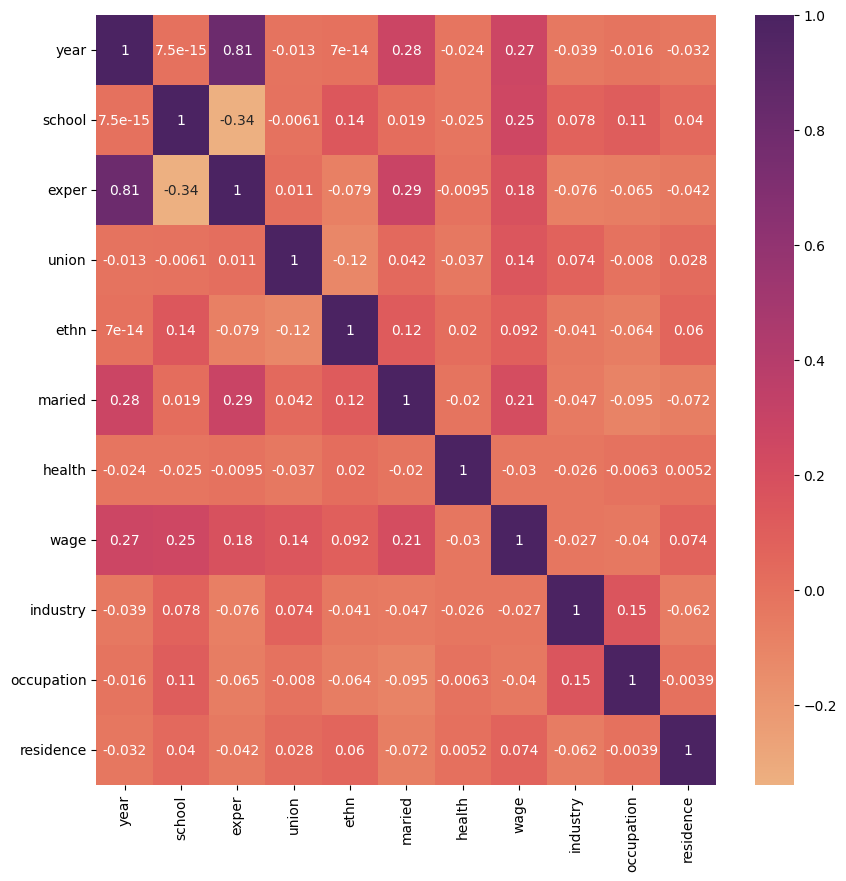

In [12]:
# checking the pearson correlation in the data
correlation = df.corr('pearson')
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='flare')

<Axes: >

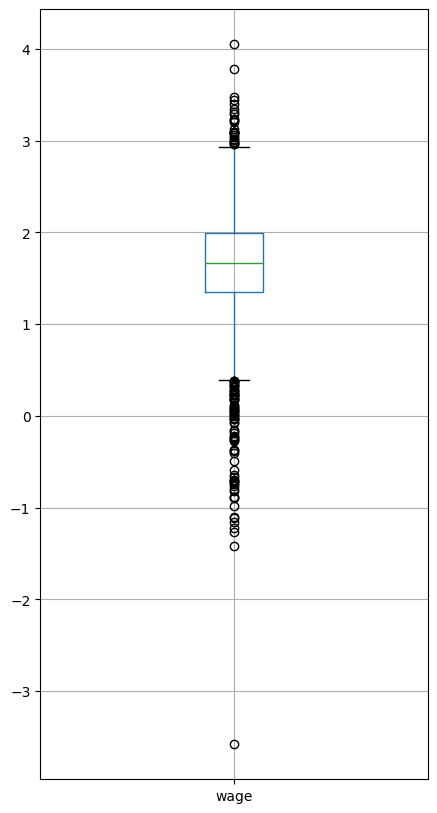

In [30]:
# plotting boxplot to check the outliers in wage ciolumn
df.boxplot(column="wage",grid= True, figsize=(5,10))

#### Wage Column has alot of outliers and some negative values. We will remove the negative values and see the correlation again

In [ ]:
# taking the values of wage column which is greater than 0
df1 = df[df['wage'] > 0]

<Axes: >

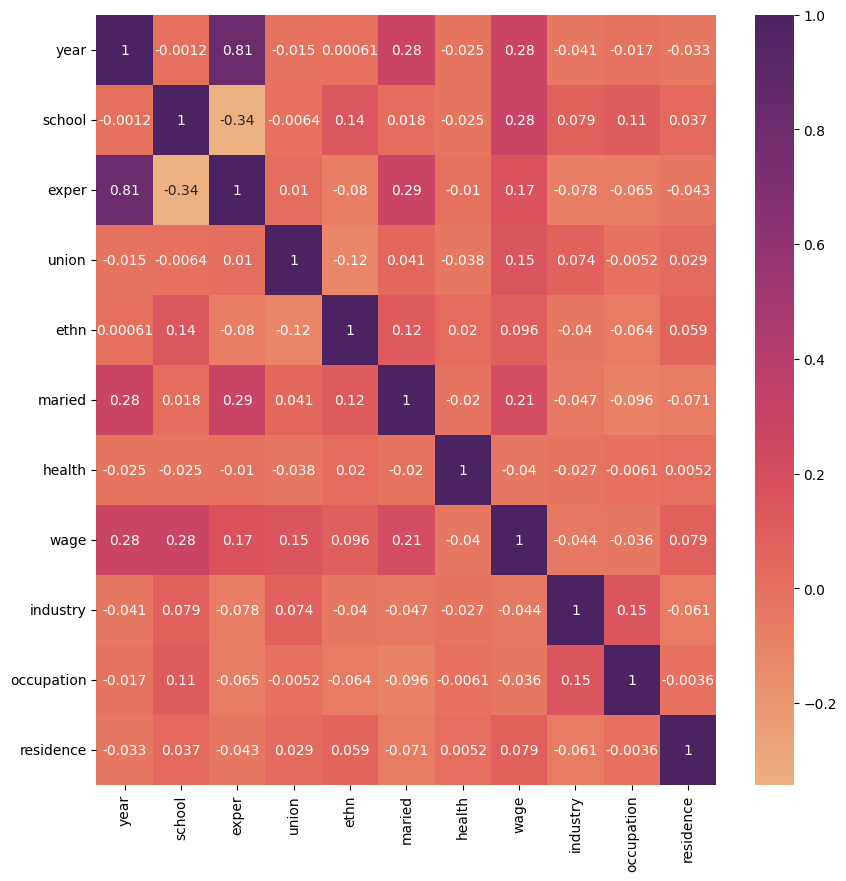

In [ ]:
# again chekcing the correlation of the data after removing the values of wage column which is less than 0
correlation = df1.corr('pearson')
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='flare')

In [17]:
df1.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


In [19]:
df.residence.value_counts()

residence
1.0    1333
2.0     964
3.0     733
4.0      85
Name: count, dtype: int64

In [ ]:
# dropping null values from the Dataset.
df2 = df1.dropna()
df2.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


In [31]:
df2.isna().sum()

year          0
school        0
exper         0
union         0
ethn          0
maried        0
health        0
wage          0
industry      0
occupation    0
residence     0
dtype: int64

<Axes: >

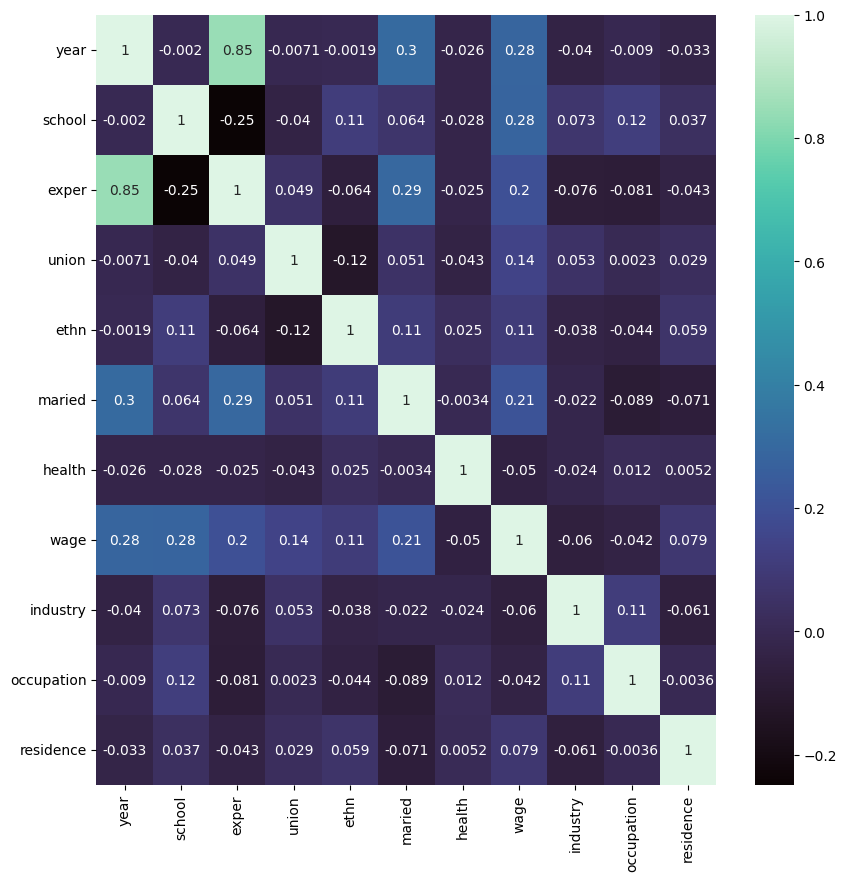

In [ ]:
# checking the correlation after droppijg the null values
correlation = df2.corr('pearson')
fig , ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='mako')

In [32]:
df2.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,1980,14,1,0,2,0,0,1.197540,1,8,3.0
1,1981,14,2,1,2,0,0,1.853060,7,8,3.0
2,1982,14,3,0,2,0,0,1.344462,1,8,3.0
3,1983,14,4,0,2,0,0,1.433213,1,8,3.0
4,1984,14,5,0,2,0,0,1.568125,7,1,3.0


In [43]:
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

In [44]:
df2_scaled.head()

,year,school,exper,union,ethn,maried,health,wage,industry,occupation,residence
0,0.000000,0.818182,0.0625,0.0,1.0,0.0,0.0,0.292980,0.090909,1.000,0.666667
1,0.142857,0.818182,0.1250,1.0,1.0,0.0,0.0,0.455353,0.636364,1.000,0.666667
2,0.285714,0.818182,0.1875,0.0,1.0,0.0,0.0,0.329372,0.090909,1.000,0.666667
3,0.428571,0.818182,0.2500,0.0,1.0,0.0,0.0,0.351356,0.090909,1.000,0.666667
4,0.571429,0.818182,0.3125,0.0,1.0,0.0,0.0,0.384774,0.636364,0.125,0.666667


<Axes: xlabel='wage', ylabel='Count'>

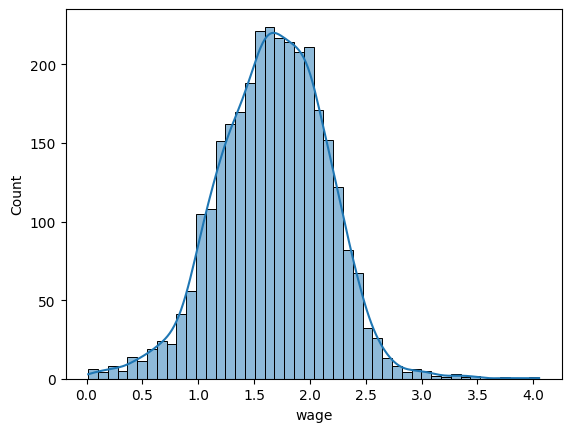

In [ ]:
# checking the distribution of wage column 
sns.histplot(data= df2["wage"], kde= True)